In [1]:
import pickle
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from functions import get_movies_scores, get_infos
from variable_selection_metrics import user_questions, random_questions, loop_simulation, metrics_simulations
from metrics import random_forest, forward_feature_selection, backward_feature_elimination, random_variable_choice, variable_mean_choice

# Load data

In [2]:
artists = pd.read_csv("data/hetrec2011-lastfm-2k/artists.dat", sep="\t", usecols=['id', 'name', 'url', 'pictureURL'])

In [3]:
with open("data/hetrec2011-lastfm-2k/tags.dat") as f:
    lines = f.readlines()
    ids = []
    values = []
    for i, line in enumerate(lines[1:]):
        ids.append(line.strip().split("\t")[0])
        values.append(line.strip().split("\t")[1])
    tags = pd.DataFrame({'tagID': ids, 'tagValue': values})

In [4]:
user_artists = pd.read_csv("data/hetrec2011-lastfm-2k/user_artists.dat", sep="\t", usecols=['userID', 'artistID', 'weight'])

In [5]:
user_friends = pd.read_csv("data/hetrec2011-lastfm-2k/user_friends.dat", sep="\t", usecols=['userID', 'friendID'])

In [6]:
user_taggedartists = pd.read_csv("data/hetrec2011-lastfm-2k/user_taggedartists.dat", sep="\t", usecols=['userID', 'artistID', 'tagID', 'day', 'month', 'year'])

In [7]:
artists.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [8]:
user_artists

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [9]:
tags.head()

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [10]:
user_taggedartists.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


# Create usable data (skip if data available)

Weight (amount of listening of an artist from an user) convert to a rating (0 or 5) to fit functions

In [126]:
weights = user_artists.weight
maxw = np.max(weights)
threshold = np.exp(0.5 * np.log(maxw))
ratings = np.zeros(weights.size, dtype=int)
ratings[weights > threshold] = 5

In [127]:
experiment_dict = {
    "item":user_artists.artistID,
    "user":user_artists.userID,
    "rating":ratings,
}

In [128]:
l = user_artists.artistID.size
for tag in tags.tagID:
    experiment_dict[int(tag)] = np.zeros(l, dtype=int)

In [129]:
for i in range(user_taggedartists.userID.size):
    experiment_dict[user_taggedartists.tagID.iloc[i]][user_artists.artistID == user_taggedartists.artistID.iloc[i]] += 1
    # if i%10000 == 0:
    #     print(i)

In [130]:
experiment_df = pd.DataFrame(experiment_dict)

In [131]:
experiment_df.head()

,item,user,rating,1,2,3,4,5,6,7,...,12639,12640,12641,12642,12643,12644,12645,12646,12647,12648
0,51,2,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52,2,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,53,2,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54,2,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55,2,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [199]:
filename = 'experiment_lastfm.pkl'
outfile = open(filename,'wb')
pickle.dump(experiment_df,outfile,protocol=4)
outfile.close()

# Load experiment data (skip if not generated)

In [12]:
pkl = open('experiment_lastfm.pkl','rb')
experiment_df = pickle.load(pkl)
pkl.close()

# Experiments

In [13]:
user_result = user_questions(experiment_df, random_variable_choice)

9215? (y/n)n


KeyboardInterrupt: 

In [17]:
import random as rd

In [84]:
p = 0.04

In [85]:
def simu(p):
    c = np.zeros(4, dtype=int)
    i = 0
    while c.sum() < 4:
        for k in range(4):
            if rd.random() < p and c[k] < 1:
                c[k] = 1
        i += 1
    return i

In [86]:
a = []
for _ in range(1000):
    a.append(simu(p))

(array([134., 291., 236., 150., 101.,  51.,  15.,  11.,   8.,   3.]),
 array([  7. ,  23.9,  40.8,  57.7,  74.6,  91.5, 108.4, 125.3, 142.2,
        159.1, 176. ]),
 <a list of 10 Patch objects>)

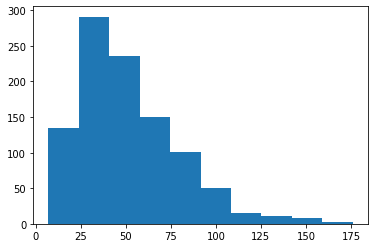

In [87]:
plt.hist(a)

In [88]:
np.mean(a)

51.287